In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns
import pandas as pd
from scipy import signal
from importlib import reload

import winsound as sd
import pickle
import sys
import os

In [2]:
# load
cd = os.getcwd()
path = os.path.dirname(cd)
    
with open(path+'//Data_final.pkl', 'rb') as file:
    Filt_idata = pickle.load(file)
    Filt_gdata = pickle.load(file)
    Filt_glen = pickle.load(file)
    F_DataLen = pickle.load(file)
    
    Af_py = pickle.load(file)
    Af_in = pickle.load(file)
    
    In_py_list = pickle.load(file)
    In_in_list = pickle.load(file)

In [3]:
with open(path+'//module//Weights_Sim//Learned weights-sim_Encoding.pkl', 'rb') as file:
    DG_E_list = pickle.load(file)
    CA3_E_list = pickle.load(file)
    CA1_E_list = pickle.load(file)

In [4]:
with open(path+'//module//Weights_Sim//Learned weights-sim_144.pkl', 'rb') as file:
    DG_E_T = pickle.load(file)
    CA3_E_T = pickle.load(file)
    CA1_E_T = pickle.load(file)

In [5]:
targetCA1 = [ 12,  14,  15,  21,  22,  31,  35,  37,  40,  56,  59,  74,  77,
         87,  88,  93,  94,  96, 104, 109, 111, 113, 116, 122, 135, 136,
        141, 150, 157, 164, 166, 182, 186, 192, 193, 196]

In [6]:
temp = np.zeros(200)
temp[targetCA1] = 1
CA1_E_T = [temp]

In [7]:
with open('Over_En.pkl', 'rb') as file:
    Simlist_INe = pickle.load(file)
    Simlist_DGe = pickle.load(file)
    Simlist_CA3e = pickle.load(file)
    Simlist_CA1e = pickle.load(file)
    Simlist_idxe = pickle.load(file)

In [8]:
with open('Over_Re.pkl', 'rb') as file:
    Simlist_INr = pickle.load(file)
    Simlist_DGr = pickle.load(file)
    Simlist_CA3r = pickle.load(file)
    Simlist_CA1r = pickle.load(file)
    Simlist_idxr = pickle.load(file)
    
    Success_list = pickle.load(file)
    Winner_list = pickle.load(file)

In [9]:
def cal_overlap(total,A,B):
    if (len(A)+len(B)) !=0:
        output = len(A.intersection(B))*2 / (len(A)+len(B))
    else:
        output = 0
    return output

In [10]:
Target_fin = [144]
T_idx = 0
NN = Target_fin[T_idx]
Num_cue = 105

In [11]:
Simlist_IN = []
Simlist_DG = []
Simlist_CA3 = []
Simlist_CA1 = []
for i, comp in enumerate(Simlist_idxr):
    Simlist_IN.append(set(Simlist_INe[comp])|set(Simlist_INr[i])) 
    Simlist_DG.append(set(Simlist_DGe[comp])|set(Simlist_DGr[i])) 
    Simlist_CA3.append(set(Simlist_CA3e[comp])|set(Simlist_CA3r[i])) 
    Simlist_CA1.append(set(Simlist_CA1e[comp])) 
Simlist_idx = Simlist_idxr

In [12]:
np.shape(Success_list)

(105,)

In [13]:
np.shape(Simlist_CA3)

(3150,)

In [14]:
np.shape(Simlist_DG)

(3150,)

In [15]:
np.shape(CA3_E_list)

(105, 2400)

In [16]:
# 
Pair_IN = []
Pair_DG = []
Pair_CA3 = []
Pair_CA1 = []
Pair_idx = []
idx_DG = []
idx_CA1 = []
idx_CA3 = []
idx_succ = []
for i, comp in enumerate(Simlist_DG):
    if len(comp) == 0:
        idx_DG.append(i)
for i, comp in enumerate(Simlist_CA1):
    if len(comp) == 0:
        idx_CA1.append(i)
for i, comp in enumerate(CA3_E_list):
    if len(np.where(comp)[0]) < 1:
        idx_CA3.append(i)
# for i, comp in enumerate(Success_list):
#     if comp < 18:
#         idx_succ.append(i)

for i, comp in enumerate(Simlist_DG):
    if i not in idx_DG and i not in idx_CA1:
        if Simlist_idx[i] not in idx_CA3 and Simlist_idx[i] not in idx_succ:
            Pair_DG.append(1-cal_overlap(set(range(800)), set(np.where(Filt_gdata[:,NN]!=0)[0]), set(comp)))
    #else:
    #    idx.append(i)

for i, comp in enumerate(Simlist_IN):
    if i not in idx_DG and i not in idx_CA1:
            if Simlist_idx[i] not in idx_CA3 and Simlist_idx[i] not in idx_succ:
                Pair_IN.append(1-cal_overlap(set(range(16)), set(np.where(Filt_idata[:,NN]!=0)[0]), set(comp)))

for i, comp in enumerate(Simlist_CA3):
    if i not in idx_DG and i not in idx_CA1:
        if Simlist_idx[i] not in idx_CA3 and Simlist_idx[i] not in idx_succ:
                #Pair_CA3.append(1-cal_relative_overlap_CA3(set(range(2400)), set(comp), T_idx))
                Pair_CA3.append(1-cal_overlap(set(range(2400)), set(Af_py[NN]), set(comp)))

for i, comp in enumerate(Simlist_idx):
    if i not in idx_DG and i not in idx_CA1:  
            if Simlist_idx[i] not in idx_CA3 and Simlist_idx[i] not in idx_succ:
                Pair_idx.append(comp)

In [17]:
Pair_CA1_fin = np.zeros(len(set(Pair_idx)))
for i, comp in enumerate(set(Pair_idx)):
    if Winner_list[:,comp].sum() == 0:
        Pair_CA1_fin[i] = 1-cal_overlap(set(range(200)), set(np.where(CA1_E_T)[1]), set(np.where(CA1_E_T)[1])|set(np.where(CA1_E_list[comp])[0]))
    else:
        A_R = Winner_list[0,comp]
        B_R = Winner_list[1,comp]
        CA1_A = 1-cal_overlap(set(range(200)), set(np.where(CA1_E_T)[1]), set(np.where(CA1_E_T)[1]))
        CA1_B = 1-cal_overlap(set(range(200)), set(np.where(CA1_E_T)[1]), set(np.where(CA1_E_list[comp])[0]))
        Pair_CA1_fin[i] = (A_R*CA1_A+B_R*CA1_B)/(A_R+B_R)

In [18]:
Pair_IN_sum = np.zeros(Num_cue)
Pair_IN_idx = np.zeros(Num_cue)
for i, comp in enumerate(Pair_idx):
    Pair_IN_sum[comp] += Pair_IN[i]
    Pair_IN_idx[comp] += 1
    
Pair_IN_fin = Pair_IN_sum/Pair_IN_idx
Pair_IN_fin = Pair_IN_fin[~np.isnan(Pair_IN_fin)]

Pair_DG_sum = np.zeros(Num_cue)
Pair_DG_idx = np.zeros(Num_cue)
for i, comp in enumerate(Pair_idx):
    Pair_DG_sum[comp] += Pair_DG[i]
    Pair_DG_idx[comp] += 1
    
Pair_DG_fin = Pair_DG_sum/Pair_DG_idx
Pair_DG_fin = Pair_DG_fin[~np.isnan(Pair_DG_fin)]

Pair_CA3_sum = np.zeros(Num_cue)
Pair_CA3_idx = np.zeros(Num_cue)
for i, comp in enumerate(Pair_idx):
    Pair_CA3_sum[comp] += Pair_CA3[i]
    Pair_CA3_idx[comp] += 1
    
Pair_CA3_fin = Pair_CA3_sum/Pair_CA3_idx
Pair_CA3_fin = Pair_CA3_fin[~np.isnan(Pair_CA3_fin)]

C:\Users\fiat_\AppData\Local\Temp\ipykernel_1792\2371016391.py:7: RuntimeWarning: invalid value encountered in divide
  Pair_IN_fin = Pair_IN_sum/Pair_IN_idx
C:\Users\fiat_\AppData\Local\Temp\ipykernel_1792\2371016391.py:16: RuntimeWarning: invalid value encountered in divide
  Pair_DG_fin = Pair_DG_sum/Pair_DG_idx
C:\Users\fiat_\AppData\Local\Temp\ipykernel_1792\2371016391.py:25: RuntimeWarning: invalid value encountered in divide
  Pair_CA3_fin = Pair_CA3_sum/Pair_CA3_idx


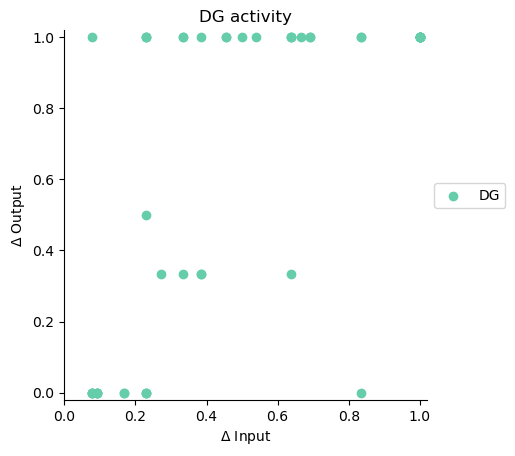

In [19]:
x = np.linspace(0,1,100)
fig = plt.subplot(111)
plt.scatter(Pair_IN_fin, Pair_DG_fin, color='mediumaquamarine', label='DG')
#plt.scatter(Pair_IN_fin, Pair_CA1_fin, color='salmon', label='CA1')
#plt.scatter(DeltaIN, DeltaCA1, color='black', label='CA1')

#plt.errorbar(DeltaI_block, DeltaO_block, yerr=DeltaO_block_std, fmt="o")
#plt.plot(x,x, color='black')
plt.axis("square")
plt.xlim([0,1.02])
plt.ylim([-0.02,1.02])
plt.xlabel('$\Delta$ Input')
plt.ylabel('$\Delta$ Output')

plt.legend(loc='lower left', bbox_to_anchor=(1.0,0.5))
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.title('DG activity')
plt.show()

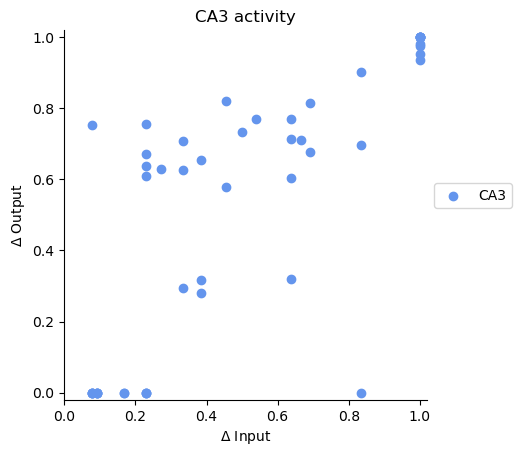

In [20]:
x = np.linspace(0,1,100)
fig = plt.subplot(111)
plt.scatter(Pair_IN_fin, Pair_CA3_fin, color='cornflowerblue', label='CA3')
#plt.scatter(Pair_IN_fin, Pair_CA1_fin, color='salmon', label='CA1')
#plt.scatter(DeltaIN, DeltaCA1, color='black', label='CA1')

#plt.errorbar(DeltaI_block, DeltaO_block, yerr=DeltaO_block_std, fmt="o")
#plt.plot(x,x, color='black')
plt.axis("square")
plt.xlim([0,1.02])
plt.ylim([-0.02,1.02])
plt.xlabel('$\Delta$ Input')
plt.ylabel('$\Delta$ Output')

plt.legend(loc='lower left', bbox_to_anchor=(1.0,0.5))
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.title('CA3 activity')
plt.show()

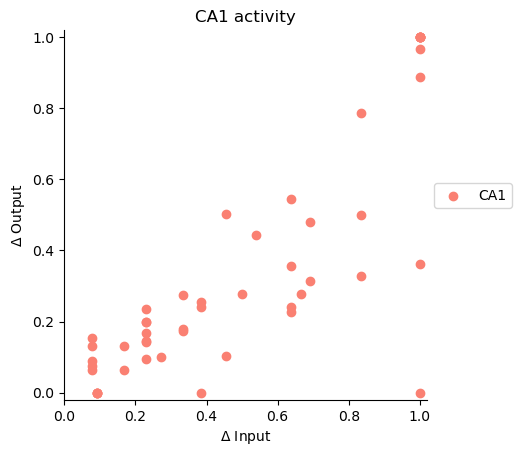

In [21]:
x = np.linspace(0,1,100)
fig = plt.subplot(111)
plt.scatter(Pair_IN_fin, Pair_CA1_fin, color='salmon', label='CA1')
#plt.scatter(Pair_IN_fin, Pair_CA1_fin, color='salmon', label='CA1')
#plt.scatter(DeltaIN, DeltaCA1, color='black', label='CA1')

#plt.errorbar(DeltaI_block, DeltaO_block, yerr=DeltaO_block_std, fmt="o")
#plt.plot(x,x, color='black')
plt.axis("square")
plt.xlim([0,1.02])
plt.ylim([-0.02,1.02])
plt.xlabel('$\Delta$ Input')
plt.ylabel('$\Delta$ Output')

plt.legend(loc='lower left', bbox_to_anchor=(1.0,0.5))
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.title('CA1 activity')
plt.show()

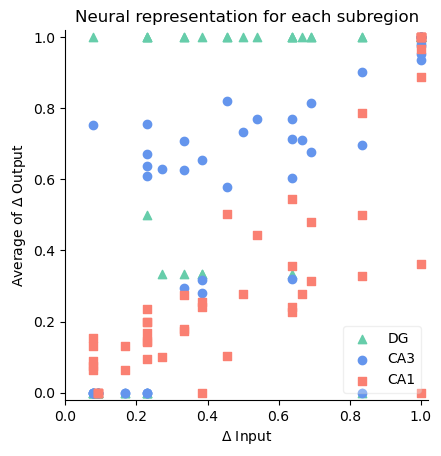

In [22]:
x = np.linspace(0,1,100)
fig = plt.subplot(111)
plt.scatter(Pair_IN_fin, Pair_DG_fin, color='mediumaquamarine', marker='^', label='DG')
plt.scatter(Pair_IN_fin, Pair_CA3_fin, color='cornflowerblue', label='CA3')
plt.scatter(Pair_IN_fin, Pair_CA1_fin, color='salmon', marker=',', label='CA1')
#plt.scatter(Pair_IN_fin, Pair_CA1_fin, color='salmon', label='CA1')
#plt.scatter(DeltaIN, DeltaCA1, color='black', label='CA1')

#plt.errorbar(DeltaI_block, DeltaO_block, yerr=DeltaO_block_std, fmt="o")
#plt.plot(x,x, color='black')
plt.axis("square")
plt.legend(loc='lower right', framealpha=0.3)
plt.xlim([0,1.02])
plt.ylim([-0.02,1.02])
plt.xlabel('$\Delta$ Input')
plt.ylabel('Average of $\Delta$ Output')

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.title('Neural representation for each subregion')
plt.savefig('Activity for each subregion.pdf', bbox_inches='tight')
plt.savefig('Activity for each subregion.tiff', bbox_inches='tight', dpi=300)
plt.show()

In [23]:
a

NameError: name 'a' is not defined

In [ ]:
DeltaIN = []
DeltaDG = []
DeltaCA3 = []
DeltaCA1 = []
Classfy_num = 40
for n in range(Classfy_num+1):
    DeltaIN.append([])
    DeltaDG.append([])
    DeltaCA3.append([])
    DeltaCA1.append([])
    
for i, comp in enumerate(Pair_IN_fin):
    if comp == 0:
        DeltaIN[0].append(comp)
        DeltaDG[0].append(Pair_DG_fin[i])
        DeltaCA3[0].append(Pair_CA3_fin[i])
        DeltaCA1[0].append(Pair_CA1_fin[i])
    for n in range(Classfy_num):    
        if (1/Classfy_num)*n < comp <= (1/Classfy_num)*n+(1/Classfy_num):
            DeltaIN[n+1].append(comp)
            DeltaDG[n+1].append(Pair_DG_fin[i])
            DeltaCA3[n+1].append(Pair_CA3_fin[i])
            DeltaCA1[n+1].append(Pair_CA1_fin[i])

DeltaIN_final = np.zeros(len(DeltaIN))
DeltaDG_final = np.zeros(len(DeltaDG))
DeltaCA3_final = np.zeros(len(DeltaCA3))
DeltaCA1_final = np.zeros(len(DeltaCA1))
for n in range(len(DeltaIN)):
    DeltaIN_final[n] = np.mean(DeltaIN[n])
    DeltaDG_final[n] = np.mean(DeltaDG[n])
    DeltaCA3_final[n] = np.mean(DeltaCA3[n])
    DeltaCA1_final[n] = np.mean(DeltaCA1[n])

In [ ]:
x = np.linspace(0,1,100)
fig = plt.subplot(111)
plt.scatter(DeltaIN_final, DeltaDG_final, color='mediumaquamarine', label='DG')

#plt.errorbar(DeltaI_block, DeltaO_block, yerr=DeltaO_block_std, fmt="o")
#plt.plot(x,x, color='black')
plt.axis("square")
plt.xlim([0,1.02])
plt.ylim([-0.02,1.02])
plt.xlabel('$\Delta$ Input')
plt.ylabel('$\Delta$ Output')

plt.legend(loc='lower left', bbox_to_anchor=(1.0,0.5))
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.title('DG activity')
plt.show()

In [ ]:
x = np.linspace(0,1,100)
fig = plt.subplot(111)
plt.scatter(DeltaIN_final, DeltaCA3_final, color='cornflowerblue', label='CA3')

#plt.errorbar(DeltaI_block, DeltaO_block, yerr=DeltaO_block_std, fmt="o")
#plt.plot(x,x, color='black')
plt.axis("square")
plt.xlim([0,1.02])
plt.ylim([-0.02,1.02])
plt.xlabel('$\Delta$ Input')
plt.ylabel('$\Delta$ Output')

plt.legend(loc='lower left', bbox_to_anchor=(1.0,0.5))
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.title('CA3 activity')
plt.show()

In [ ]:
x = np.linspace(0,1,100)
fig = plt.subplot(111)
plt.scatter(DeltaIN_final, DeltaCA1_final, color='salmon', label='CA1')

#plt.errorbar(DeltaI_block, DeltaO_block, yerr=DeltaO_block_std, fmt="o")
#plt.plot(x,x, color='black')
plt.axis("square")
plt.xlim([0,1.02])
plt.ylim([-0.02,1.02])
plt.xlabel('$\Delta$ Input')
plt.ylabel('$\Delta$ Output')

plt.legend(loc='lower left', bbox_to_anchor=(1.0,0.5))
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.title('CA1 activity')
plt.show()

In [ ]:
x = np.linspace(0,1,100)
fig = plt.subplot(111)
plt.scatter(DeltaIN_final, DeltaDG_final, color='mediumaquamarine', marker='^', label='DG')
plt.scatter(DeltaIN_final, DeltaCA3_final, color='cornflowerblue', label='CA3')
plt.scatter(DeltaIN_final, DeltaCA1_final, color='salmon', marker=',', label='CA1')

#plt.errorbar(DeltaI_block, DeltaO_block, yerr=DeltaO_block_std, fmt="o")
#plt.plot(x,x, color='black')
plt.legend(loc='lower right')
plt.axis("square")
plt.xlim([0,1.02])
plt.ylim([-0.02,1.02])
plt.xlabel('$\Delta$ Input')
plt.ylabel('Average of $\Delta$ Output')

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.title('Neural representation for each subregion')
plt.savefig('Activity for each subregion.pdf', bbox_inches='tight')
plt.show()